Notebook for Lidl-Interview 11.10.2022.

Code and some ideas partially inspired from the following source:
1. https://www.kaggle.com/code/minatab/case-study-expanding-candy-brand (code for confusion matrices and regplots)

Ideas that are implemented in this notebook:
1. Overview of the dataset.
2. Overview of Pearson correlations of features.
3. Overview of regplots and their interpretation.
4. Overview of Pearson correlations as main criteria to choose most relevant features to create new candy.

As I see it, the biggest disadvantage of my solution is an absence of PCA or similar dimensionality reduction approaches, which would allow more precise winner/loser feature selection. 


Ideas that are not implemented (due to lack of understanding how the approaches are used):
1. Usage of Factor Analysis of Mixed Data (https://www.kaggle.com/code/minatab/case-study-expanding-candy-brand) 
2. Usage of PCA and clustering in some mysterious way (https://datacolumn.iaa.ncsu.edu/blog/2020/10/29/analyzing-the-ultimate-halloween-candy-power-ranking/)
3. What approaches are used to achieve same metrics (https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/#fn-3)

In [1]:
# download the dataset
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv

--2022-11-10 21:45:00--  https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5205 (5.1K) [text/plain]
Saving to: ‘candy-data.csv’

candy-data.csv      100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-11-10 21:45:00 (36.9 MB/s) - ‘candy-data.csv’ saved [5205/5205]



In [28]:
#import libraries and read the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
DATA_PATH = '/content/candy-data.csv'
df = pd.read_csv(DATA_PATH, index_col = 'competitorname')
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


For each candy (competitorname) there are two type of features: categorical (if there is chocolate/caramel/etc. in the candy) and continous, such as percentile of sugar, the offered price devided by a maximum price and the overall win percentage in the matchups from 269,000 samples.

In [34]:
# Check the size of dataset
f'Dataset contains {len(df)} samples, each sample is consisted of {len(df.columns)} features'

'Dataset contains 85 samples, each sample is consisted of 12 features'

In [31]:
# Data seems to be without NaN's or comparable missing values.
# To doublecheck we will run following command and check if there 
# are any NaN's in the dataframe.
print(df.isnull().values.any())

False


In [3]:
# After inspecting the dataset, we can find out two types of features:
# 1. taste features and 2. physical features of the candy.
taste_features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy']
phys_features = ['nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

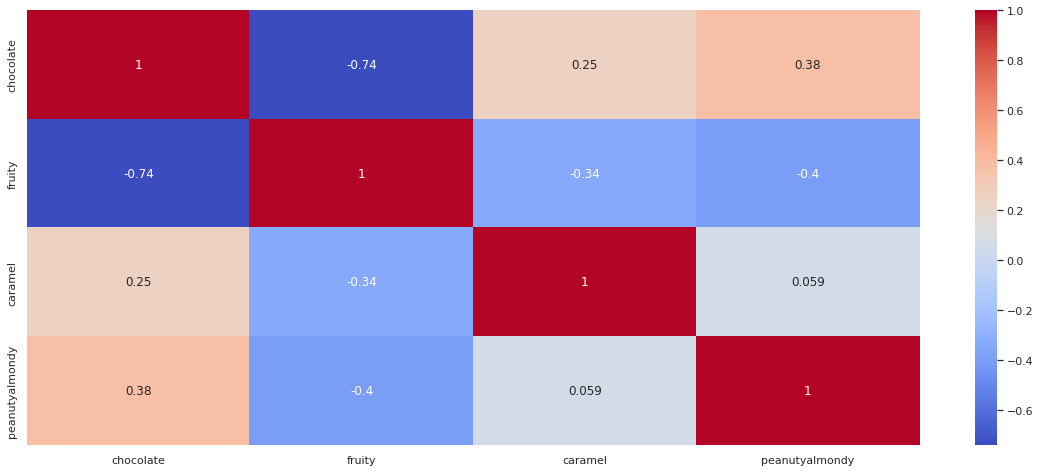

In [4]:
#ingredient correlation:
plt.figure(figsize = (20,8))        
sns.heatmap(df.loc[:,taste_features].corr(),annot=True, cmap = 'coolwarm')

Intepreting the figure above, we can come to an interesting insight, that 'fruity' is negatively correlated with all other taste features, such as fruity and chocolate are very unlikely to be combined together, while chocolate, caramel and peanuts have positive correlation.

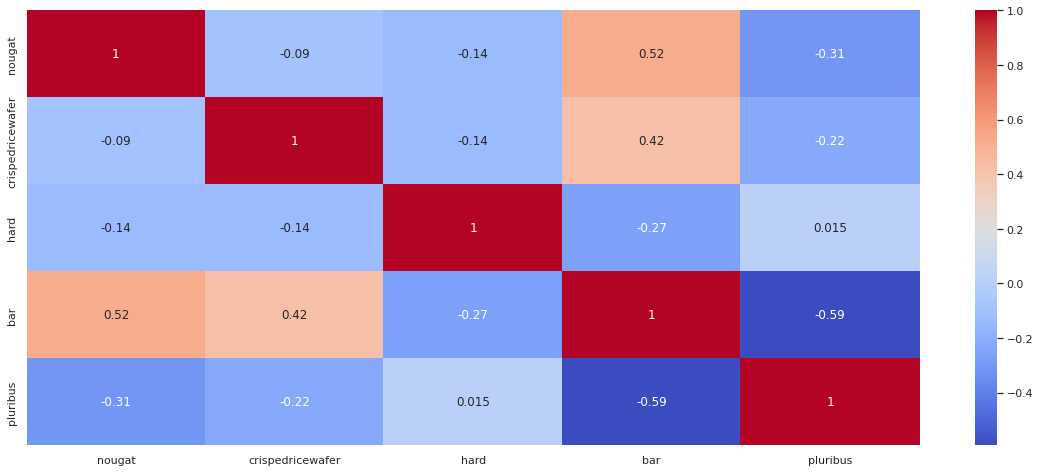

In [5]:
#physical property correlation:
plt.figure(figsize = (20,8))        
sns.heatmap(df.loc[:,phys_features].corr(),annot=True, cmap = 'coolwarm')

From the above map we can figure out that soft candies, such as nougat or crispy candies are likely to be in bar and they are likely not be hard because of their negative correlation.

Now lets take a look how different components affect the percentile of sugar, price and winning probability.

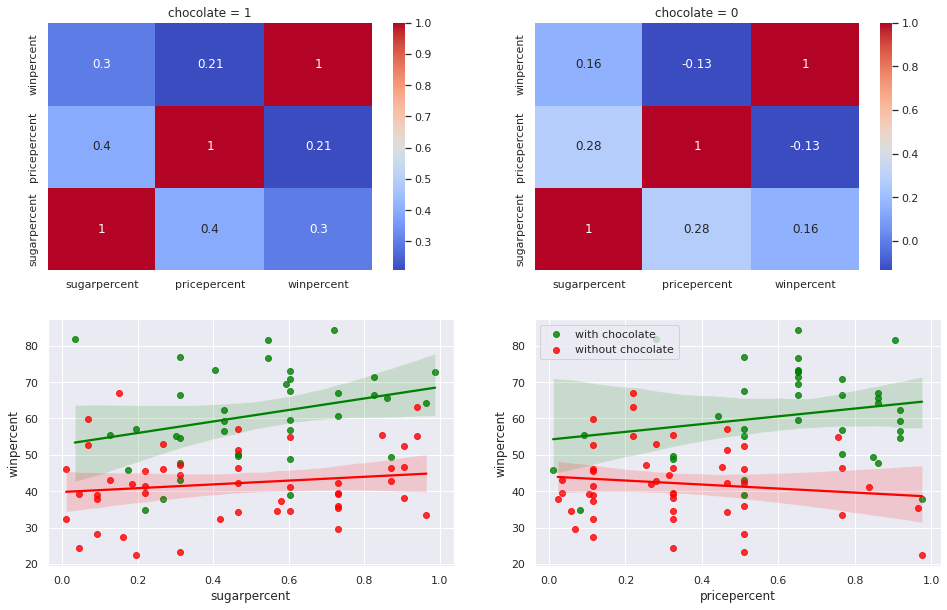

In [6]:
f, ax = plt.subplots(2,2, figsize = (16,10))
feature = "chocolate"
sns.heatmap(df.loc[df[feature]==1,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,0])
sns.heatmap(df.loc[df[feature]==0,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,1])    
ax[0,0].set_title(feature + " = 1")
ax[0,0].set_ylim([0,3])
ax[0,1].set_title(feature + " = 0")  
ax[0,1].set_ylim([0,3])

sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,0], label = "with "+feature, color = 'green')
sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,0], label = "without "+feature, color = 'red')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,1], label = "with "+feature, color = 'green')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,1], label = "without "+feature, color = 'red')
plt.legend()
plt.show()

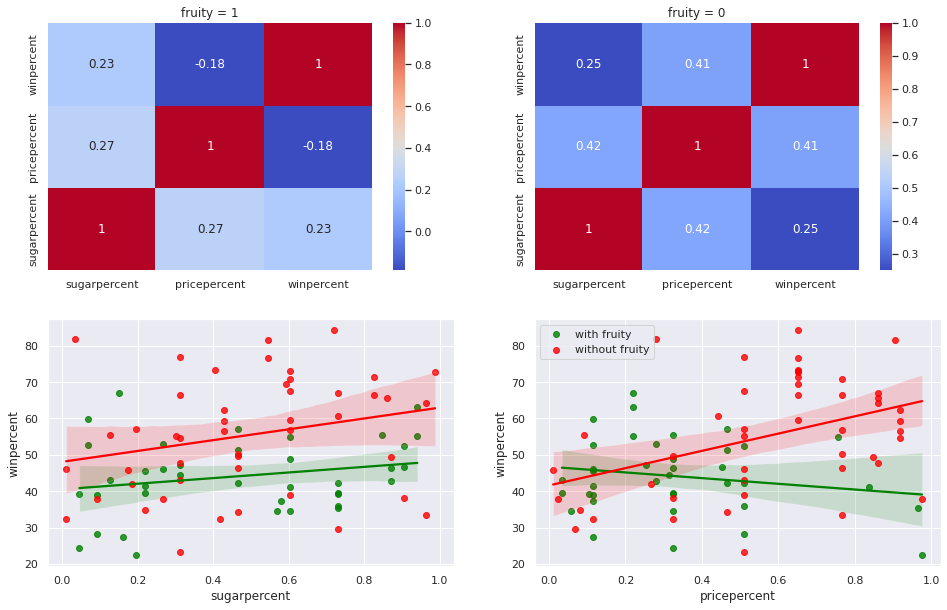

In [7]:
f, ax = plt.subplots(2,2, figsize = (16,10))
feature = "fruity"
sns.heatmap(df.loc[df[feature]==1,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,0])
sns.heatmap(df.loc[df[feature]==0,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,1])    
ax[0,0].set_title(feature + " = 1")
ax[0,0].set_ylim([0,3])
ax[0,1].set_title(feature + " = 0")  
ax[0,1].set_ylim([0,3])

sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,0], label = "with "+feature, color = 'green')
sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,0], label = "without "+feature, color = 'red')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,1], label = "with "+feature, color = 'green')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,1], label = "without "+feature, color = 'red')
plt.legend()
plt.show()

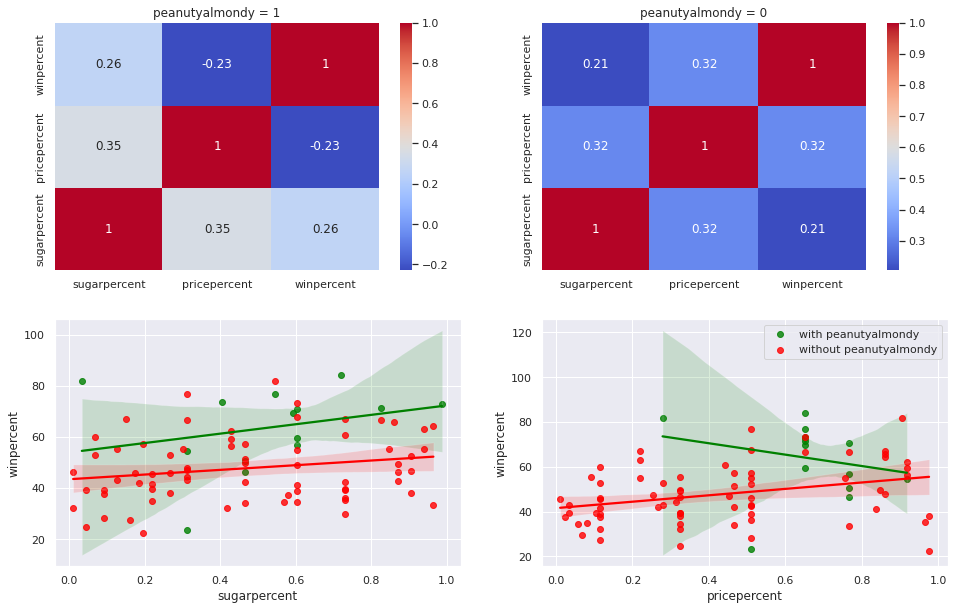

In [8]:
#physical property correlation:
f, ax = plt.subplots(2,2, figsize = (16,10))
feature = "peanutyalmondy"
sns.heatmap(df.loc[df[feature]==1,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,0])
sns.heatmap(df.loc[df[feature]==0,['sugarpercent', 'pricepercent', 'winpercent']].corr(),annot=True, cmap = 'coolwarm', ax=ax[0,1])    
ax[0,0].set_title(feature + " = 1")
ax[0,0].set_ylim([0,3])
ax[0,1].set_title(feature + " = 0")  
ax[0,1].set_ylim([0,3])

sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,0], label = "with "+feature, color = 'green')
sns.regplot(x="sugarpercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,0], label = "without "+feature, color = 'red')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==1], ax = ax[1,1], label = "with "+feature, color = 'green')
sns.regplot(x="pricepercent", y="winpercent",
               truncate=True, data=df[df[feature]==0], ax = ax[1,1], label = "without "+feature, color = 'red')
plt.legend()
plt.show()

The main idea of creating a new candy is to look at how the winprecentage is correlated with other features. For this purpose, we will plot the Pearson correlation taste and physical features and its win percentage (as well as sugar and price percentage, since those are not the descriptitive features of a candy itself).

And as we see from the plot, chocolate candies have the most positive correlation with the win percentage among all candies. Second most correlated is its packaging in bar, third is containing peanut or almond. A naive idea would be to create a 'frankenstein'-candy, containing N of the most correlated features and try it out.

To find out what exactly chocolate to use, we could sort the comptetitors by their winpercentage and take the cholocate from the top one.

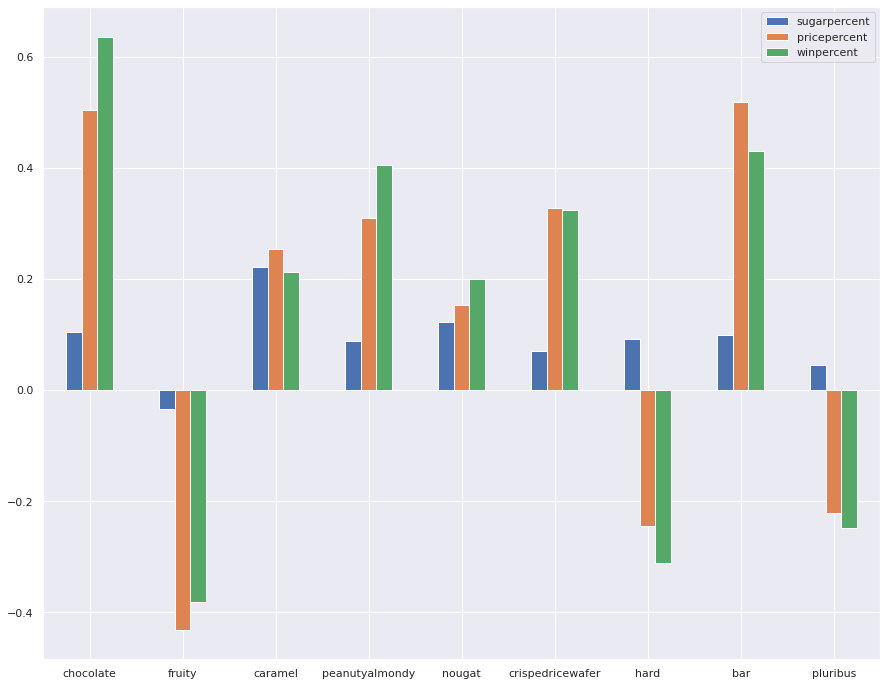

In [35]:
df = pd.read_csv(DATA_PATH, index_col = 'competitorname')
df = df.corr().iloc[:-3][df.columns[-3:]]
df.transpose()
df.plot.bar(figsize=(15,12), rot=0)